## 0. Código

In [1]:
!pip install numpy seaborn

In [2]:
# Importar librearías

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Configuración general de la estética de los plots/gráficas

COLOR_BASE = '#00AF43'
TAMAÑO_TITULO_FIGURA = 13
TAMAÑO_TITULO_PLOT = 11.5
TAMAÑO_ETIQUETAS_EJES = 9.5
TAMAÑO_TICKS_VALORES = 9

## 1. Compración entre Formas de Generar la Población Inicial

In [4]:
def GenerarPoblaciónInicial(
        TamañoPoblación: int,
        DimensiónProblema: int,
        Distribución: str = 'Uniforme',
        ParamétrosDistribución: tuple[float,float] = (-100,100),
    ) -> np.ndarray:
    """
    Descripción
    -----------
    Función para generar la **población inicial** de soluciones de forma *aleatoria*. 
    Puede ser generada usando una distribución `Uniforme` (lo recomendado) o 
    con una distribución `Normal`. Devuelve la población en un array de NumPy 
    generado con los parámetros pasados
    
    Parameters
    ----------
    TamañoPoblación: int
        Representa el *número de soluciones* o el tamño de tu población

    DimensiónProblema: int
        Representa el *tamaño o dimensión de la entrada* de tu función a optimizar

    Distribución: str
        Nombre de la *función de distribución* a emplear para generar la población (`Uniforme` o `Normal`)

    ParamétrosDistribución: tuple[float,float]
        *Lista de parámetros* (e.g. media, std) que definen a la distribución que vas a usar

    Return
    ------
    Población
        *Array de población* que se creó de forma aleatoria
    """

    FormaMatrizPoblación = (TamañoPoblación,DimensiónProblema)
    
    if Distribución == 'Uniforme':
        GenerarPoblaciónAleatoria = np.random.uniform
    if Distribución == 'Normal':
        GenerarPoblaciónAleatoria = np.random.normal
    
    return GenerarPoblaciónAleatoria(*ParamétrosDistribución,FormaMatrizPoblación)

In [5]:
def VisualizarPoblación(
        PoblaciónSoluciones: np.ndarray,
        EjePlot: plt.Axes,
    ) -> None:
    """
    Descripción
    -----------
    Función que permite **visualizar/graficar** una población. Solo plotea 
    los *atributos/dimensiones 1 y 2* haciendo uso de un *scatter plot*.

    Parameters
    ----------
    PoblaciónSoluciones: np.ndarray
        *Población de soluciones* que se van a graficar

    EjePlot: plt.Axes
        *Eje o axe de `matplotlib`* sobre el cual se va a plotear la población (o cear el plot)
    """

    sns.scatterplot(
        x = PoblaciónSoluciones[:,0],
        y = PoblaciónSoluciones[:,1],
        
        color = COLOR_BASE,
        ax = EjePlot,
    )

    EjePlot.set_xlabel('Atributo 1',size=TAMAÑO_ETIQUETAS_EJES)
    EjePlot.set_ylabel('Atributo 2',size=TAMAÑO_ETIQUETAS_EJES)
    EjePlot.tick_params(labelsize=TAMAÑO_TICKS_VALORES)

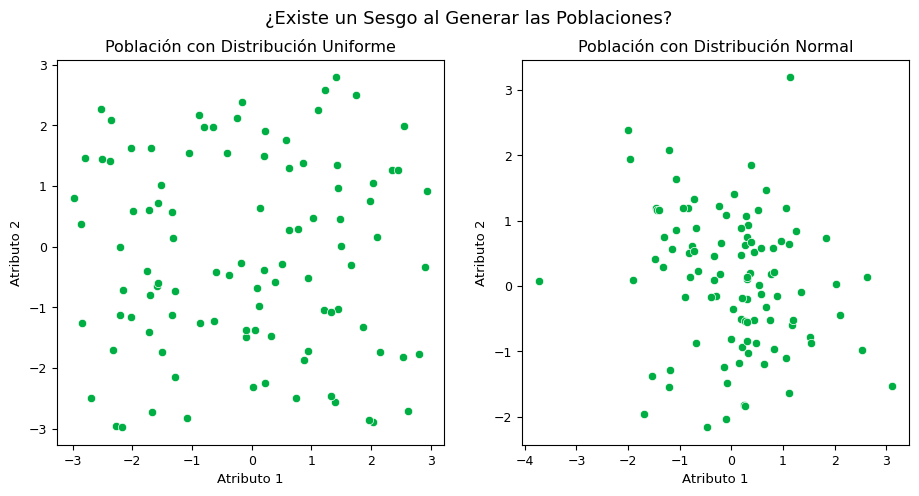

In [6]:
TiposDistribución = ['Uniforme','Normal']
ParámetrosDistribución = [(-3,3),(0,1)]

Figura , EjesPlots = plt.subplots(1,2,figsize=(11,5))
for _tipo_distribución , _parámetros_distribución , _indice_eje in zip(TiposDistribución,ParámetrosDistribución,range(2)):
    _población_generada = GenerarPoblaciónInicial(100,2,_tipo_distribución,_parámetros_distribución)
    
    _eje_plot = EjesPlots[_indice_eje]
    VisualizarPoblación(_población_generada,_eje_plot)
    _eje_plot.set_title(f'Población con Distribución {_tipo_distribución}',size=TAMAÑO_TITULO_PLOT)

Figura.suptitle('¿Existe un Sesgo al Generar las Poblaciones?',fontsize=TAMAÑO_TITULO_FIGURA);

## 2. Visualización de las Operaciones que realiza Evolución Diferencial

### 2.1. Operación de Mutación

In [ ]:
def OperaciónMutaciónAleatoria(
        PoblaciónSoluciones: np.ndarray,
        FactorEscala: float,
    ) -> np.ndarray:
    """
    Descripción
    -----------
    Función que aplica la **operación de mutación** para generar un 
    nuevo individuo (solución) siguiendo el esquema **`rand/1`**; donde 
    a un *individuo aleatorio se le suma la diferencia escalada de 
    otros dos vectores*.

    Parameters
    ----------
    PoblaciónSoluciones: np.ndarray
        *Población de soluciones o individuos* sobre los cuales se aplica la mutación

    FactorEscala: float
        *Parámetro `F` de DE* que multiplica/escala la diferencia de los vectores

    Return
    ------
    IndividuoMutado: np.ndarray
        *Nuevo individuo* generado después de aplicar la *operación de mutación*
    """

    TamañoPoblación = PoblaciónSoluciones.shape[0]
    IndiceIndividuoMutado , IndiceInvididuoDiferencia_1 , IndiceInvididuoDiferencia_2 = np.random.randint(TamañoPoblación,size=3)

    IndividuoMutado = PoblaciónSoluciones[IndiceIndividuoMutado]
    DiferenciaIndividuos = PoblaciónSoluciones[IndiceInvididuoDiferencia_1] - PoblaciónSoluciones[IndiceInvididuoDiferencia_2]

    return IndividuoMutado + FactorEscala*DiferenciaIndividuos

def OperaciónMutaciónAleatoriaVariasDiferencias(
        PoblaciónSoluciones: np.ndarray,
        FactoresEscala: list[float],
    ) -> np.ndarray:
    """
    Descripción
    -----------
    Función que aplica la **operación de mutación** para generar un 
    nuevo individuo (solución) siguiendo el esquema **`rand/k`**; donde 
    a un *individuo aleatorio se le suma `k` diferencias escalada de 
    vectores*.

    Parameters
    ----------
    PoblaciónSoluciones: np.ndarray
        *Población de soluciones o individuos* sobre los cuales se aplica la mutación

    FactoresEscala: list[float],
        Lista de *parámetros `F` de DE* que multiplican/escalan las respectivas diferencias de vectores

    Return
    ------
    IndividuoMutado: np.ndarray
        *Nuevo individuo* generado después de aplicar la *operación de mutación*
    """

    TamañoPoblación = PoblaciónSoluciones.shape[0]
    IndiceIndividuoMutado = np.random.randint(TamañoPoblación)

    IndividuoMutado = PoblaciónSoluciones[IndiceIndividuoMutado]

    for factor_escala in FactoresEscala:
        indice_individuo_diferencia_1 , indice_individuo_diferencia_2 = np.random.randint(TamañoPoblación,size=2)
        diferencia_individuos = PoblaciónSoluciones[indice_individuo_diferencia_1] - PoblaciónSoluciones[indice_individuo_diferencia_2]
        IndividuoMutado += factor_escala*diferencia_individuos

    return IndividuoMutado

In [ ]:
def OperaciónMutaciónMejor(
        PoblaciónSoluciones: np.ndarray,
        MejorIndividuo: int,
        FactorEscala: float,
    ) -> np.ndarray:
    """
    Descripción
    -----------
    Función que aplica la **operación de mutación** para generar un 
    nuevo individuo (solución) siguiendo el esquema **`best/1`**; donde 
    al *mejor individuo se le suma la diferencia escalada de dos vectores*.

    Parameters
    ----------
    PoblaciónSoluciones: np.ndarray
        *Población de soluciones o individuos* sobre los cuales se aplica la mutación

    FactoresEscala: list[float],
        *Parámetros `F` de DE* que multiplica/escala la diferencia de los vectores

    Return
    ------
    IndividuoMutado: np.ndarray
        *Nuevo individuo* generado después de aplicar la *operación de mutación*
    """

    TamañoPoblación = PoblaciónSoluciones.shape[0]
    IndiceInvididuoDiferencia_1 , IndiceInvididuoDiferencia_2 = np.random.randint(TamañoPoblación,size=2)

    IndividuoMutado = PoblaciónSoluciones[MejorIndividuo]
    DiferenciaIndividuos = PoblaciónSoluciones[IndiceInvididuoDiferencia_1] - PoblaciónSoluciones[IndiceInvididuoDiferencia_2]

    return IndividuoMutado + FactorEscala*DiferenciaIndividuos

def OperaciónMutaciónMejorVariasDiferencias(
        PoblaciónSoluciones: np.ndarray,
        MejorIndividuo: int,
        FactoresEscala: list[float],
    ) -> np.ndarray:
    """
    Descripción
    -----------
    Función que aplica la **operación de mutación** para generar un 
    nuevo individuo (solución) siguiendo el esquema **`best/k`**; donde 
    al *mejor individuo se le suma `k` diferencias escalada de vectores*.

    Parameters
    ----------
    PoblaciónSoluciones: np.ndarray
        *Población de soluciones o individuos* sobre los cuales se aplica la mutación

    FactoresEscala: list[float],
        Lista de *parámetros `F` de DE* que multiplican/escalan las respectivas diferencias de vectores

    Return
    ------
    IndividuoMutado: np.ndarray
        *Nuevo individuo* generado después de aplicar la *operación de mutación*
    """

    TamañoPoblación = PoblaciónSoluciones.shape[0]
    IndividuoMutado = PoblaciónSoluciones[MejorIndividuo]

    for factor_escala in FactoresEscala:
        indice_individuo_diferencia_1 , indice_individuo_diferencia_2 = np.random.randint(TamañoPoblación,size=2)
        diferencia_individuos = PoblaciónSoluciones[indice_individuo_diferencia_1] - PoblaciónSoluciones[indice_individuo_diferencia_2]
        IndividuoMutado += factor_escala*diferencia_individuos

    return IndividuoMutado

### 2.2. Operación de Cruza (Crossover)

In [ ]:
def OperaciónCruzaBinomial(
        IndividuoBase: np.ndarray,
        IndividuoMutado: np.ndarray,
        ProbabilidadCruza: float = 0.5,
    ) -> np.ndarray:
    """
    Descripción
    -----------
    Función que aplica la **operación de cruza** entre un individuo *base* 
    (perteneciente a la población) y uno *mutado* siguiedo el esquema 
    **binomial (`bin`)**; donde cada atributo del individuo base tiene 
    una **probabilidad `Cr`** de ser *reemplazado* por el atributo del individuo 
    mutado.

    Parameters
    ----------
    IndividuoBase: np.ndarray
        *Individuo (Solución)* que se le aplica la operación de cruza

    IndividuoMutado: np.ndarray
        *Individuo mutado* generado en base a la población de individuos

    ProbabilidadCruza: float
        *Parámetro `Cr` de DE* que determina si se reemplaza el atributo o no

    Return
    ------
    IndividuoCruzado: np.ndarray
        Individuo (Solución) resultante de la operación de cruza entre un individuo y uno mutado
    """

    IndividuoCruzado = IndividuoBase.copy()
    DimensiónProblema = IndividuoCruzado.shape[0]

    for indice_atributo in range(DimensiónProblema):
        umbral_cruza = np.random.random()
        if umbral_cruza <= ProbabilidadCruza:
            IndividuoCruzado[indice_atributo] = IndividuoMutado[indice_atributo]

    IndiceMutado = np.random.randint(DimensiónProblema)
    IndividuoCruzado[IndiceMutado] = IndividuoMutado[IndiceMutado]

    return IndividuoCruzado

In [ ]:
def OperaciónCruzaExponencial(
        IndividuoBase: np.ndarray,
        IndividuoMutado: np.ndarray,
        ProbabilidadCruza: float = 0.5,
    ) -> np.ndarray:
    """
    Descripción
    -----------
    Función que aplica la **operación de cruza** entre un individuo *base* 
    (perteneciente a la población) y uno *mutado* siguiedo el esquema 
    **exponencal (`exp`)**; donde una *secuencia de atributos* del individuo 
    base son reemplazados por los atributos del mutado con una **probabilidad `Cr`** 
    de hacer crecer la secuencia (bloque) de atributos.

    Parameters
    ----------
    IndividuoBase: np.ndarray
        *Individuo (Solución)* que se le aplica la operación de cruza

    IndividuoMutado: np.ndarray
        *Individuo mutado* generado en base a la población de individuos

    ProbabilidadCruza: float
        *Parámetro `Cr` de DE* que determina si se reemplaza el atributo o no

    Return
    ------
    IndividuoCruzado: np.ndarray
        Individuo (Solución) resultante de la operación de cruza entre un individuo y uno mutado
    """

    IndividuoCruzado = IndividuoBase.copy()
    DimensiónProblema = IndividuoCruzado.shape[0]
    
    IndiceIncial = np.random.randint(DimensiónProblema)
    LongitudBloque = 0
    while (np.random.random() <= ProbabilidadCruza) or (LongitudBloque == DimensiónProblema):
        indice = (IndiceIncial+LongitudBloque)%DimensiónProblema
        IndividuoCruzado[indice] = IndividuoMutado[indice]
        
        LongitudBloque += 1

    return IndividuoCruzado

In [84]:
_población_generada = GenerarPoblaciónInicial(10,5,ParamétrosDistribución=(-1,1))
_individuo_1 = _población_generada[3]
_individuo_2 = _población_generada[5]
_individuo_1 , _individuo_2 , OperaciónCruzaExponencial(_individuo_1,_individuo_2,0.7)

(array([ 0.0547363 , -0.14539966, -0.14347746, -0.07207093, -0.84102817]),
 array([ 0.51014787,  0.5349657 , -0.28797609, -0.12588605, -0.49969494]),
 array([ 0.51014787, -0.14539966, -0.28797609, -0.12588605, -0.49969494]))